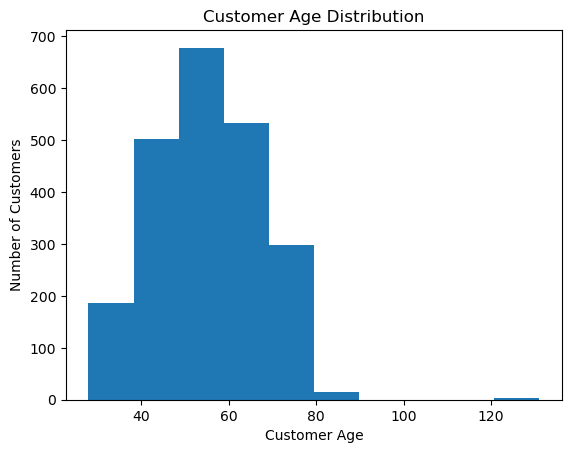

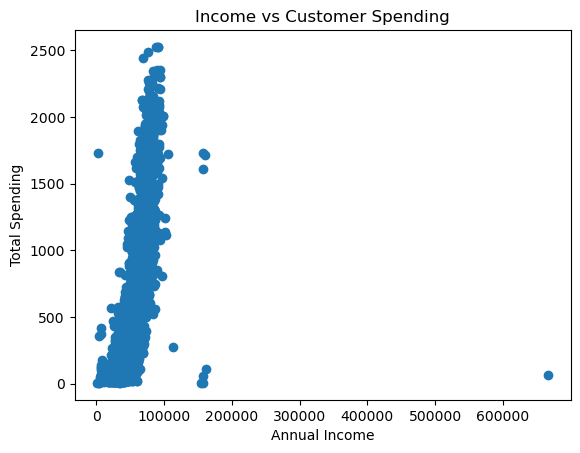

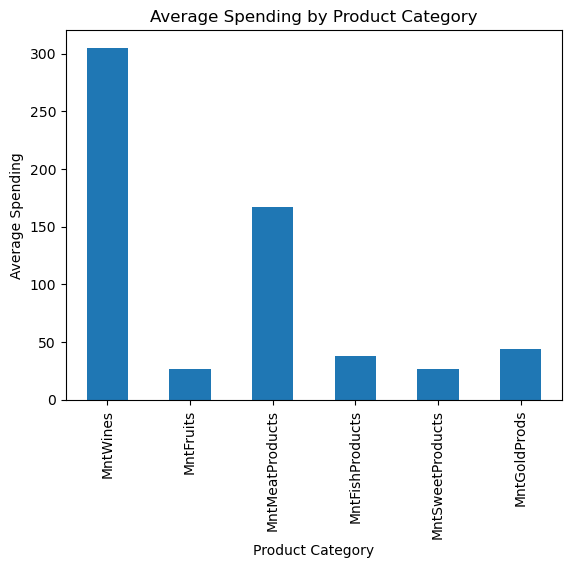

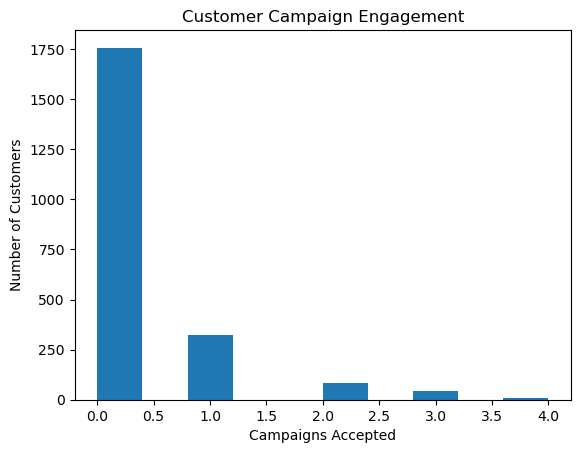

c:\Users\tilla\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\tilla\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\tilla\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tilla\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^


SEGMENT SUMMARY (AVERAGES):

          Age   Income  Total_Spending  Total_Campaign_Accepted
Segment                                                        
0        47.1  34488.7           147.2                      0.1
1        67.8  49231.9           379.5                      0.1
2        53.9  84053.3          1533.4                      2.5
3        55.0  72486.3          1244.9                      0.3

CUSTOMER COUNT PER SEGMENT:

Segment
0    868
1    577
2    134
3    637
Name: count, dtype: int64


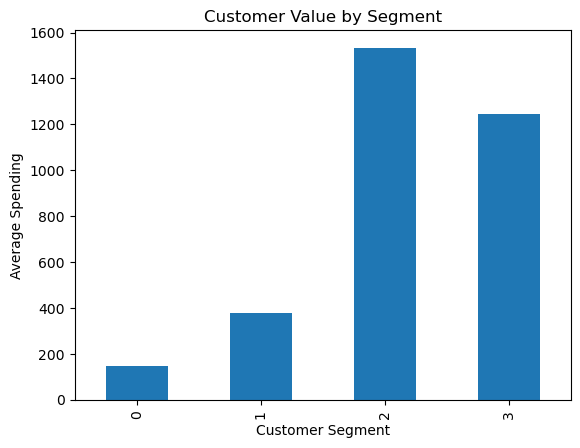

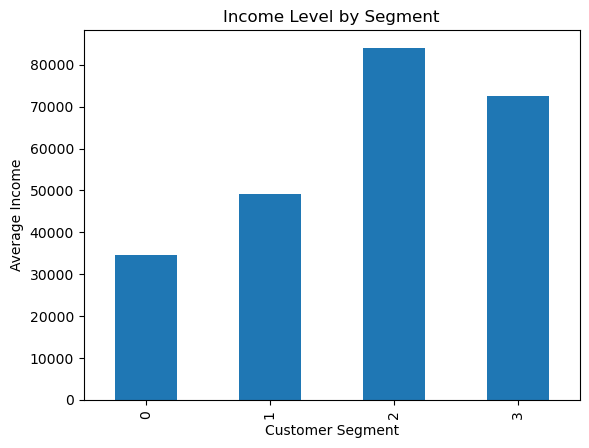

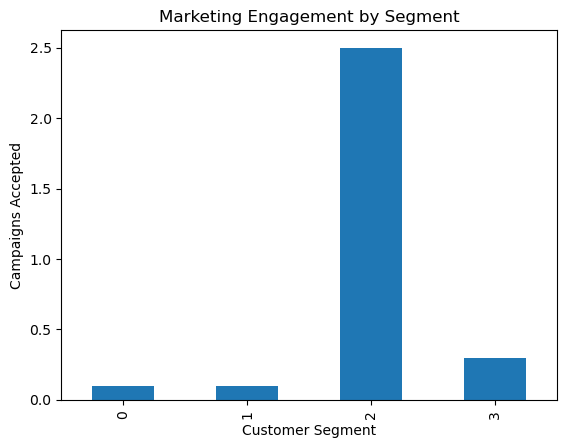


FINAL BUSINESS SEGMENT SUMMARY:

                               Income  Total_Spending  \
Segment_Label                                           
Affluent Selective Customers  72486.3          1244.9   
High-Value Loyal Customers    84053.3          1533.4   
Low-Value Price-Sensitive     34488.7           147.2   
Older Conservative Spenders   49231.9           379.5   

                              Total_Campaign_Accepted  Customer_Count  
Segment_Label                                                          
Affluent Selective Customers                      0.3             637  
High-Value Loyal Customers                        2.5             134  
Low-Value Price-Sensitive                         0.1             868  
Older Conservative Spenders                       0.1             577  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_excel(r"C:\Users\tilla\Downloads\marketing_campaign.xlsx")

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Age'] = 2024 - df['Year_Birth']

spending_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

df['Total_Spending'] = df[spending_cols].sum(axis=1)

campaign_cols = [
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5'
]

df['Total_Campaign_Accepted'] = df[campaign_cols].sum(axis=1)

df = df.dropna(subset=['Income'])

plt.figure()
plt.hist(df['Age'])
plt.xlabel("Customer Age")
plt.ylabel("Number of Customers")
plt.title("Customer Age Distribution")
plt.show()

plt.figure()
plt.scatter(df['Income'], df['Total_Spending'])
plt.xlabel("Annual Income")
plt.ylabel("Total Spending")
plt.title("Income vs Customer Spending")
plt.show()

avg_category_spending = df[spending_cols].mean()

plt.figure()
avg_category_spending.plot(kind='bar')
plt.xlabel("Product Category")
plt.ylabel("Average Spending")
plt.title("Average Spending by Product Category")
plt.show()

plt.figure()
plt.hist(df['Total_Campaign_Accepted'])
plt.xlabel("Campaigns Accepted")
plt.ylabel("Number of Customers")
plt.title("Customer Campaign Engagement")
plt.show()

segmentation_features = df[
    ['Age', 'Income', 'Total_Spending', 'Total_Campaign_Accepted']
]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

segment_summary = df.groupby('Segment').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Total_Spending': 'mean',
    'Total_Campaign_Accepted': 'mean'
}).round(1)

segment_counts = df['Segment'].value_counts().sort_index()

print("\nSEGMENT SUMMARY (AVERAGES):\n")
print(segment_summary)

print("\nCUSTOMER COUNT PER SEGMENT:\n")
print(segment_counts)

plt.figure()
segment_summary['Total_Spending'].plot(kind='bar')
plt.xlabel("Customer Segment")
plt.ylabel("Average Spending")
plt.title("Customer Value by Segment")
plt.show()

plt.figure()
segment_summary['Income'].plot(kind='bar')
plt.xlabel("Customer Segment")
plt.ylabel("Average Income")
plt.title("Income Level by Segment")
plt.show()

plt.figure()
segment_summary['Total_Campaign_Accepted'].plot(kind='bar')
plt.xlabel("Customer Segment")
plt.ylabel("Campaigns Accepted")
plt.title("Marketing Engagement by Segment")
plt.show()

segment_labels = {
    0: "Low-Value Price-Sensitive",
    1: "Older Conservative Spenders",
    2: "High-Value Loyal Customers",
    3: "Affluent Selective Customers"
}

df['Segment_Label'] = df['Segment'].map(segment_labels)

final_summary = df.groupby('Segment_Label').agg({
    'Income': 'mean',
    'Total_Spending': 'mean',
    'Total_Campaign_Accepted': 'mean',
    'Segment_Label': 'count'
}).rename(columns={'Segment_Label': 'Customer_Count'}).round(1)

print("\nFINAL BUSINESS SEGMENT SUMMARY:\n")
print(final_summary)
